In [0]:
'''
  author : @hunarbatra
''' 

import numpy as np                          
import pandas as pd                           
import matplotlib.pyplot as plt              
import seaborn as sns                          
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Global Mobility Data
# This is the Google Global Mobility Data 
# Link for this dataset = https://drive.google.com/file/d/1Sk9j6vMnvPz95IMCNUUJB_HeyqJDCLdc/view?usp=sharing
link = '/content/drive/My Drive/Global_Mobility_Report4.csv'
df = pd.read_csv(link, header=0, usecols = lambda column : column not in ["country_region_code", "sub_region_1" , "sub_region_2"], engine = 'python', parse_dates = True)

In [6]:
# Dataset : Task 9 Oxford 33 Countries Dataset
# link : https://drive.google.com/open?id=1zlxHQ_SWBXUr-ZYiKBrf-p5bHqxQ5S2y
link = '/content/drive/My Drive/oxford33.csv'
policy_data = pd.read_csv(link, header=0, index_col=['Date'], engine = 'python', parse_dates = True)
policy_data.fillna(0)

,CountryName,S1_School_closing,S1_scope,S2_Workplace_closing,S2_scope,S3_Cancel_public_events,S3_scope,S4_Close_public_transport,S4_scope,S5_Public_info_campaigns,S5_scope,S6_Restrictions on internal movement,S6_scope,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing policy,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Health_infrastructure,Health_equipment,Health_workforce,Managing_other_health_services,Domestic_violence,Managing_essential_services_for_households,Exemptions_for_affected_households,Low_interest_lending_to_businesses,Tax_relief_businesses,Income_support_households,Postponed_loans_businesses,Access_employment_insurance,Migrant_workers_policies
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-02,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-03,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-04,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-05,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-12,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,14.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0
2020-04-13,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,14.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0
2020-04-14,Zimbabwe,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,25.0,0.0,0.0,0.0,1.0,17.0,3.0,88.1,88.1,1,0,1,0,0,1,1,0,1,1,0,0,0.0


In [0]:
#countries = ['Argentina','Australia','Bangladesh','Brazil','Canada','Costa Rica','Denmark','Ecuador','Egypt','Germany','Hungary','India','Indonesia',
#             'Italy','Japan','Kenya','Malaysia','Pakistan','Philippines','Romania','Serbia','Singapore','South Africa','South Korea','Sweden','Tunisia',
#             'Turkey','United States','Vietnam','Zimbabwe']

countries = ['Australia', 'Brazil', 'Denmark', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United States']

In [0]:
# List of Dates for Plotting - x-axis
xdates = df.date.unique()
xdates = xdates[:len(xdates)-10]
xdates = xdates.tolist()

In [0]:
def plot_country(country_name) :
  country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 16/04
  dates = xdates 
  country_mobility_data = country_mobility_data.head(62) # 15th Feb .... 16th April
  dates = xdates
    
  country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
  country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data

  new_cases = [None] * 62
  new_cases[0] = 0
  country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
  policy_new_cases = country_policies['ConfirmedCases'].tolist()
  max_cases = max(policy_new_cases)
  for i in range(1, len(new_cases)) :
    if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
    new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) #/ max_cases * 1000 

  fig, ax = plt.subplots(figsize=(24,12))
  ax.plot_date(dates, new_cases , linestyle='--', label = 'New Cases Daily',linewidth=4,marker='h', markerfacecolor='yellow', markeredgewidth = 2, markersize = 12, color = 'red')
  # Oxford Healthcare Data Annotations
  s10 = country_policies['S10_Emergency investment in health care'].tolist()
  for x in range(len(s10)):
    if s10[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Emergency Investment in Healthcare", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 40), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  s11 = country_policies['S11_Investment in Vaccines'].tolist() 
  for x in range(len(s11)):
    if s11[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Investment in Vaccines", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 70), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break
      
  infra = country_policies['Health_infrastructure'].tolist()
  for x in range(len(infra)):
    if infra[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Health Infrastructure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 80), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  equip = country_policies['Health_equipment'].tolist()
  for x in range(len(equip)):
    if equip[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Health Equipment", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  workforce = country_policies['Health_workforce'].tolist()
  for x in range(len(workforce)):
    if workforce[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Health Workforce", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  other = country_policies['Managing_other_health_services'].tolist()
  for x in range(len(other)):
    if other[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
      ax.annotate("Managing other health services", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break


  s12 = country_policies['S12_Testing policy'].tolist()
  for x in range(len(s12)):
    if s12[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- yellow
      ax.annotate("Testing Policy - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='yellow'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break
  for x in range(len(s12)):
    if s12[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- orange
      ax.annotate("Testing Policy - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break
  for x in range(len(s12)):
    if s12[x] == 3: # if the policy is there i.e value will be 3 .... add an arrow annotation at that point -- red
      ax.annotate("Testing Policy - 3", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break  

  s13 = country_policies['S13_Contact tracing'].tolist()
  for x in range(len(s13)):
    if s13[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- orange
      ax.annotate("Contact Tracing - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break
  for x in range(len(s13)):
    if s13[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- red
      ax.annotate("Contact Tracing - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                  arrowprops=dict(facecolor='black', shrink=0.05))
      break

  plt.title(country_name, fontsize=18)
  plt.grid(True)
  plt.xlabel("Dates", fontsize=15)
  plt.ylabel("Number of Daily Cases", fontsize=15)
  plt.legend(loc="best", fontsize=15)
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=45)
  plt.show()

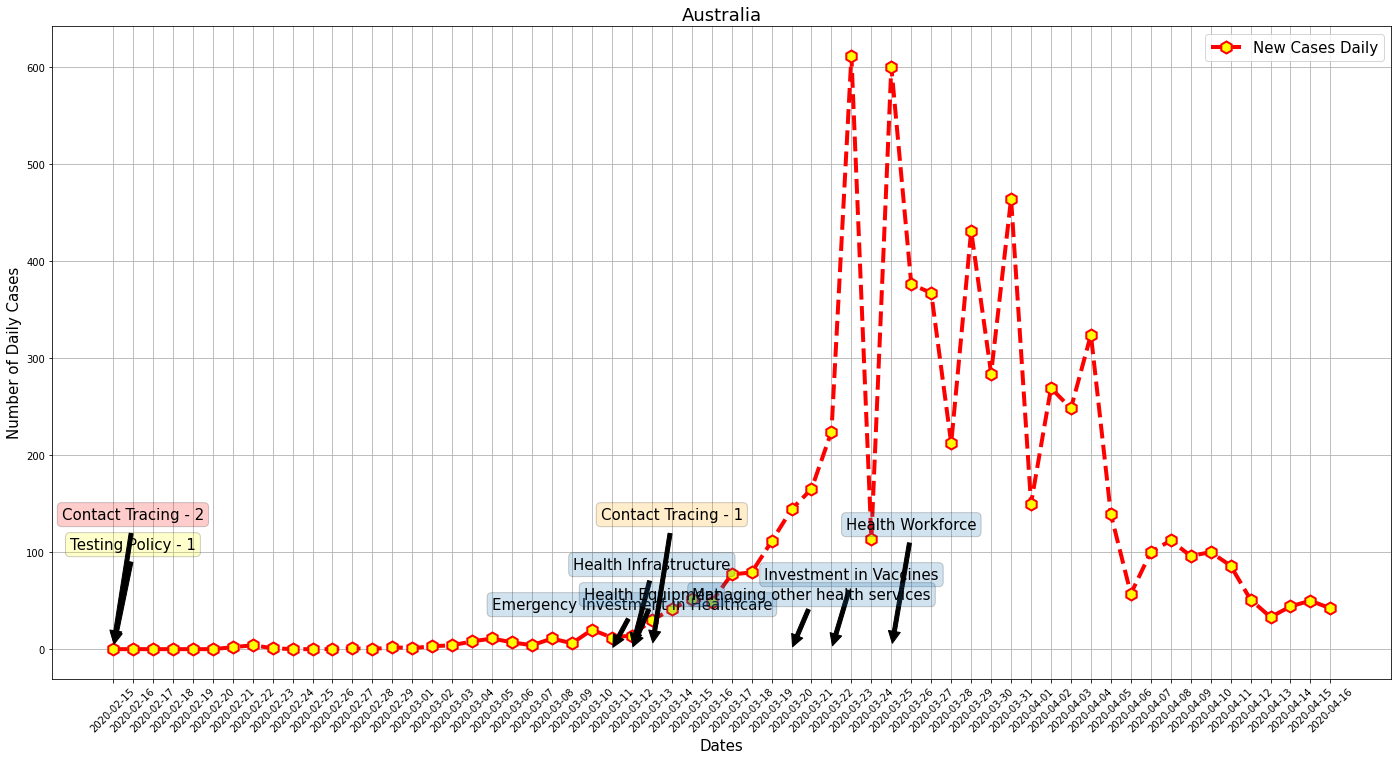

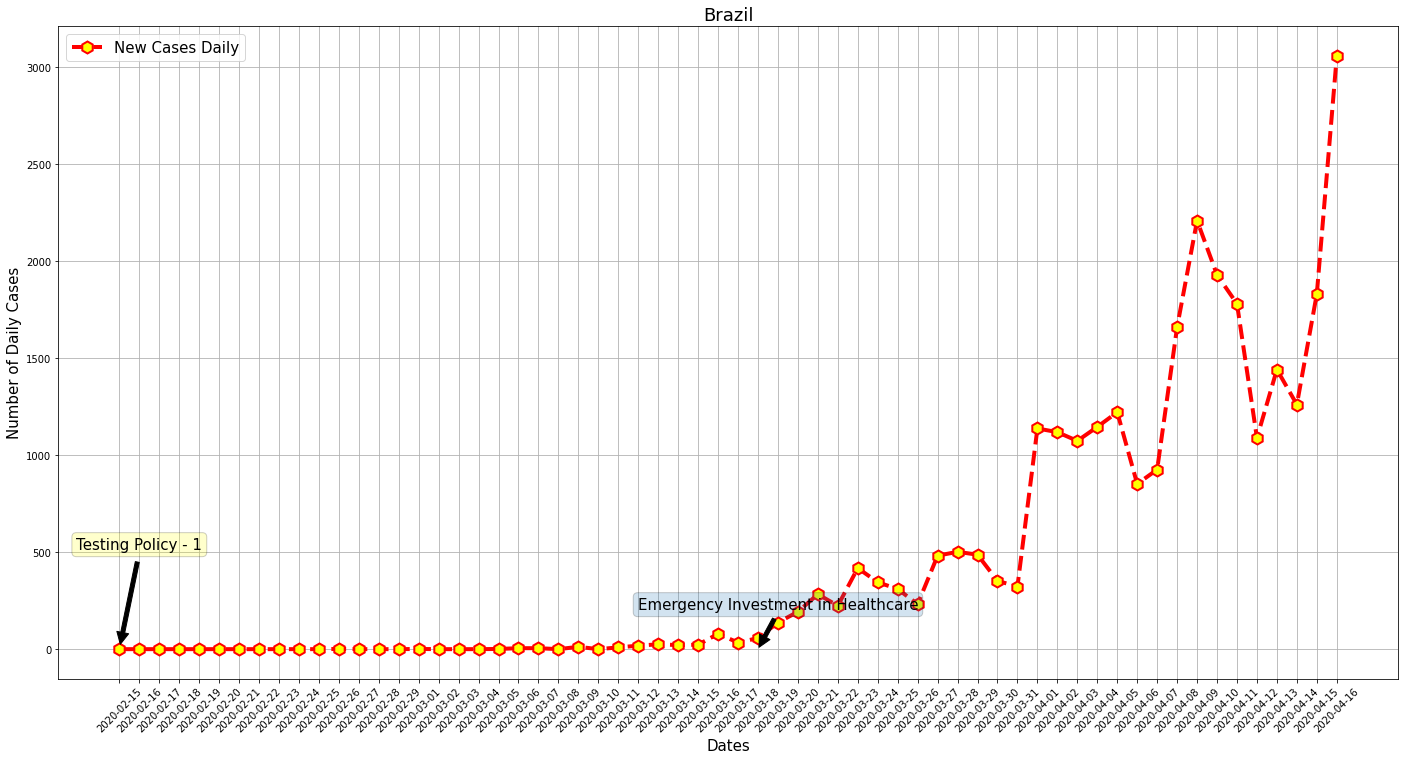

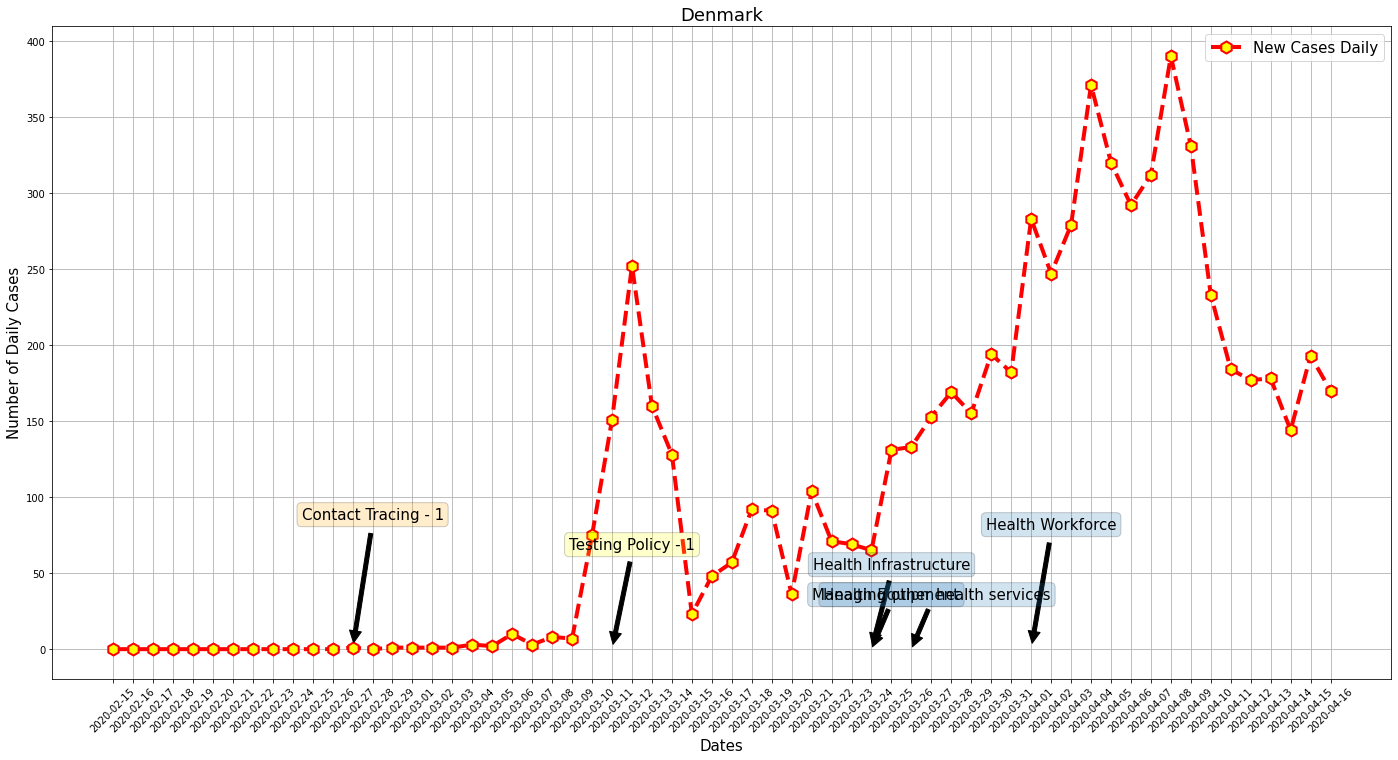

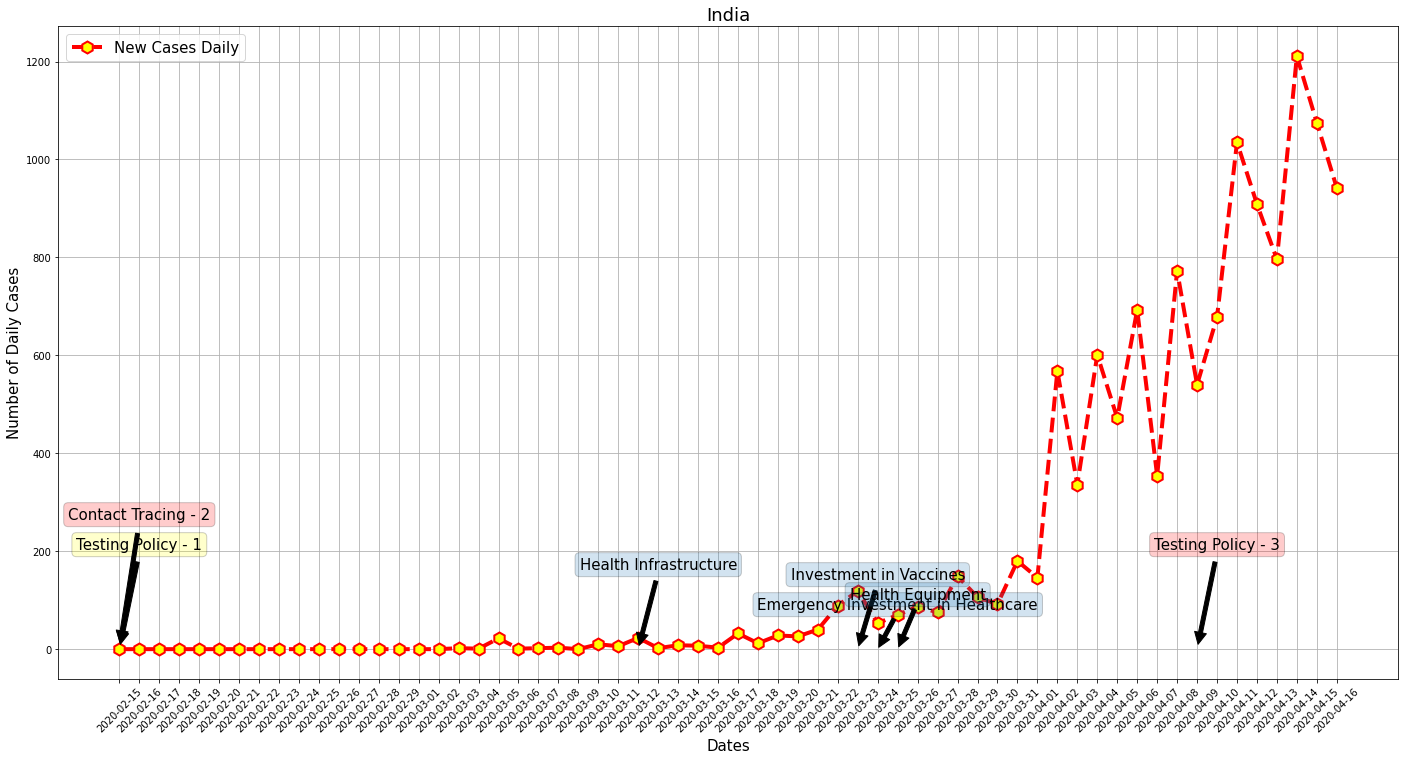

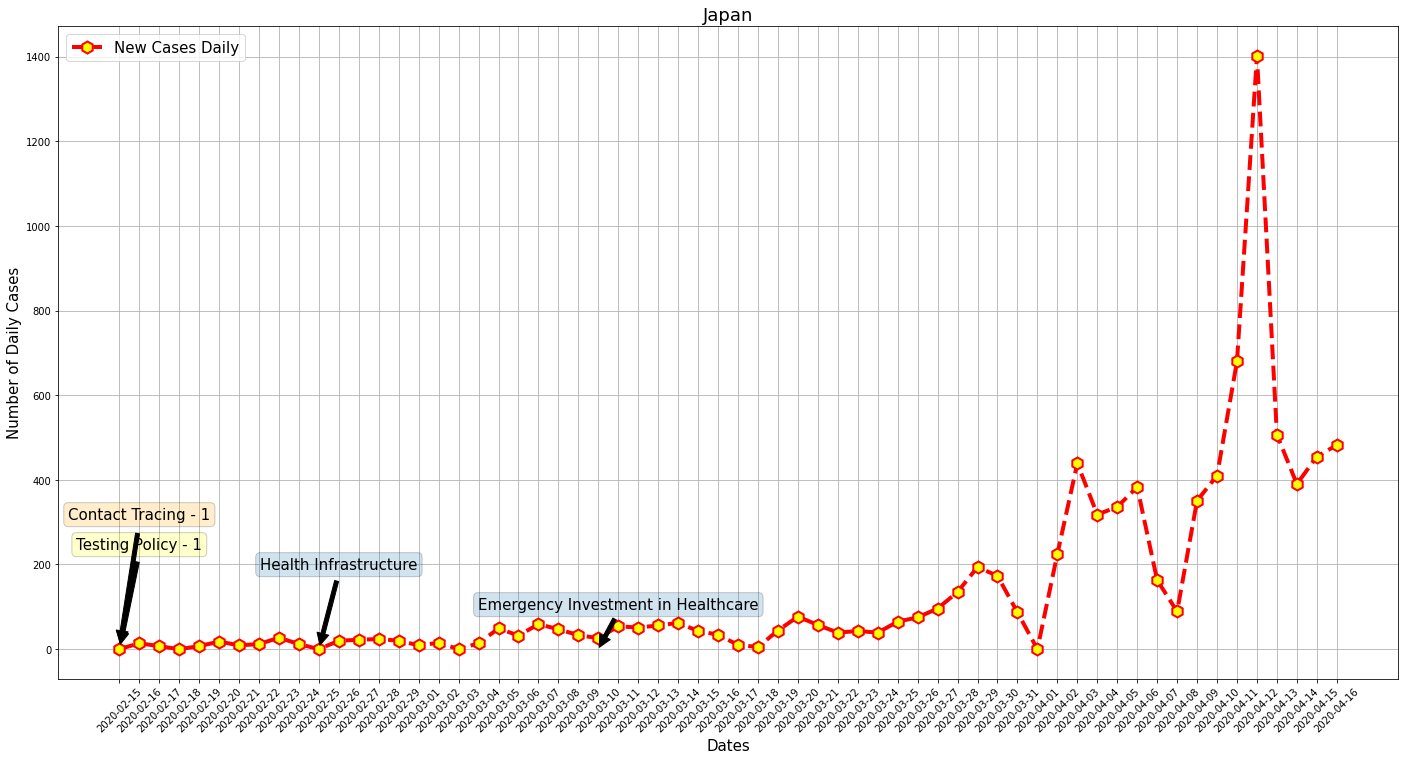

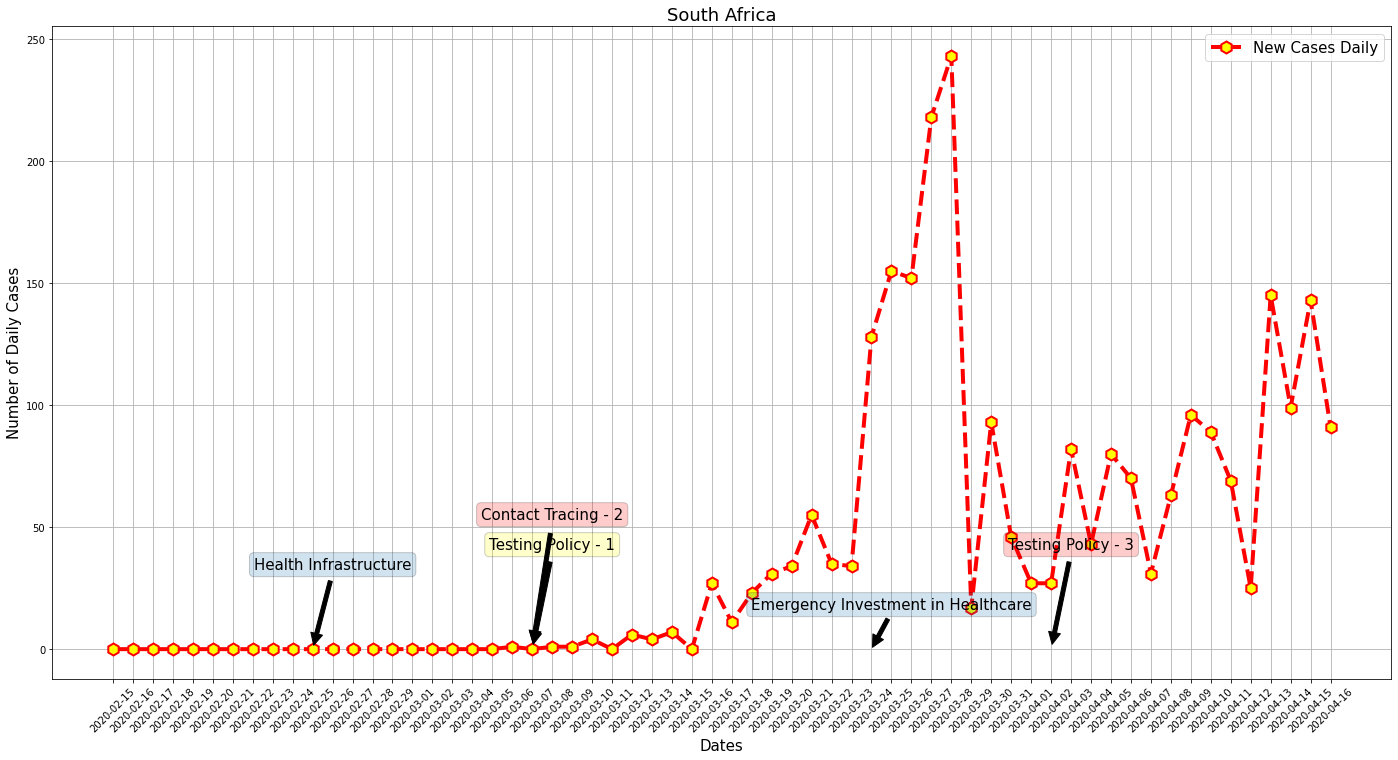

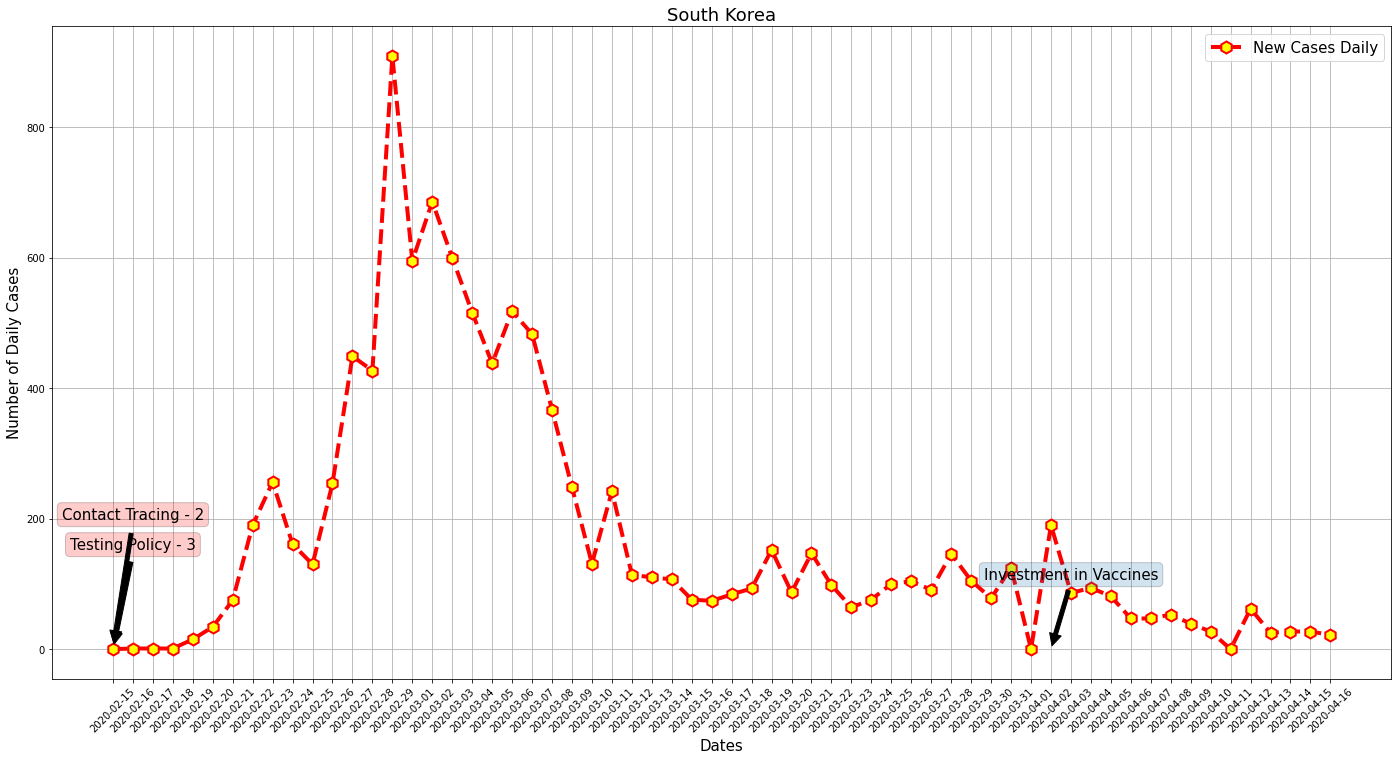

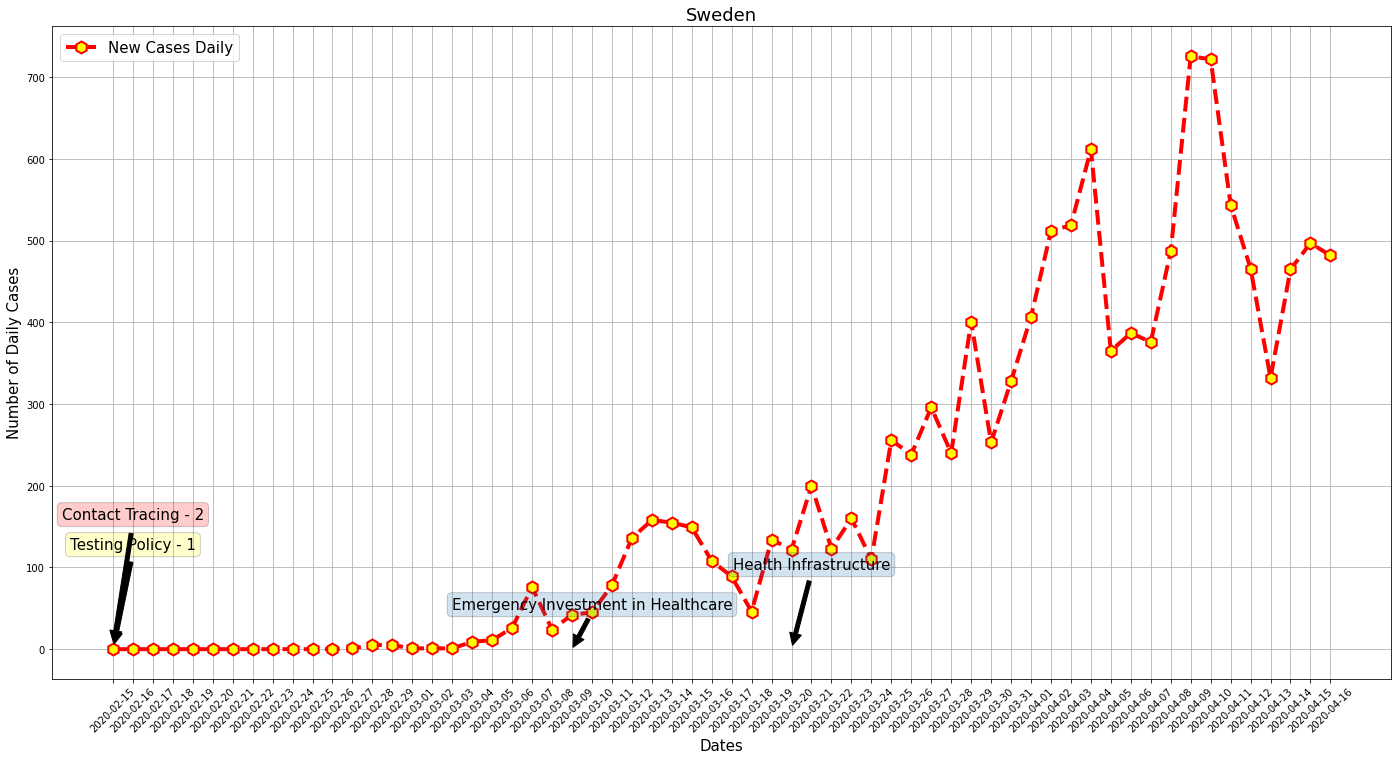

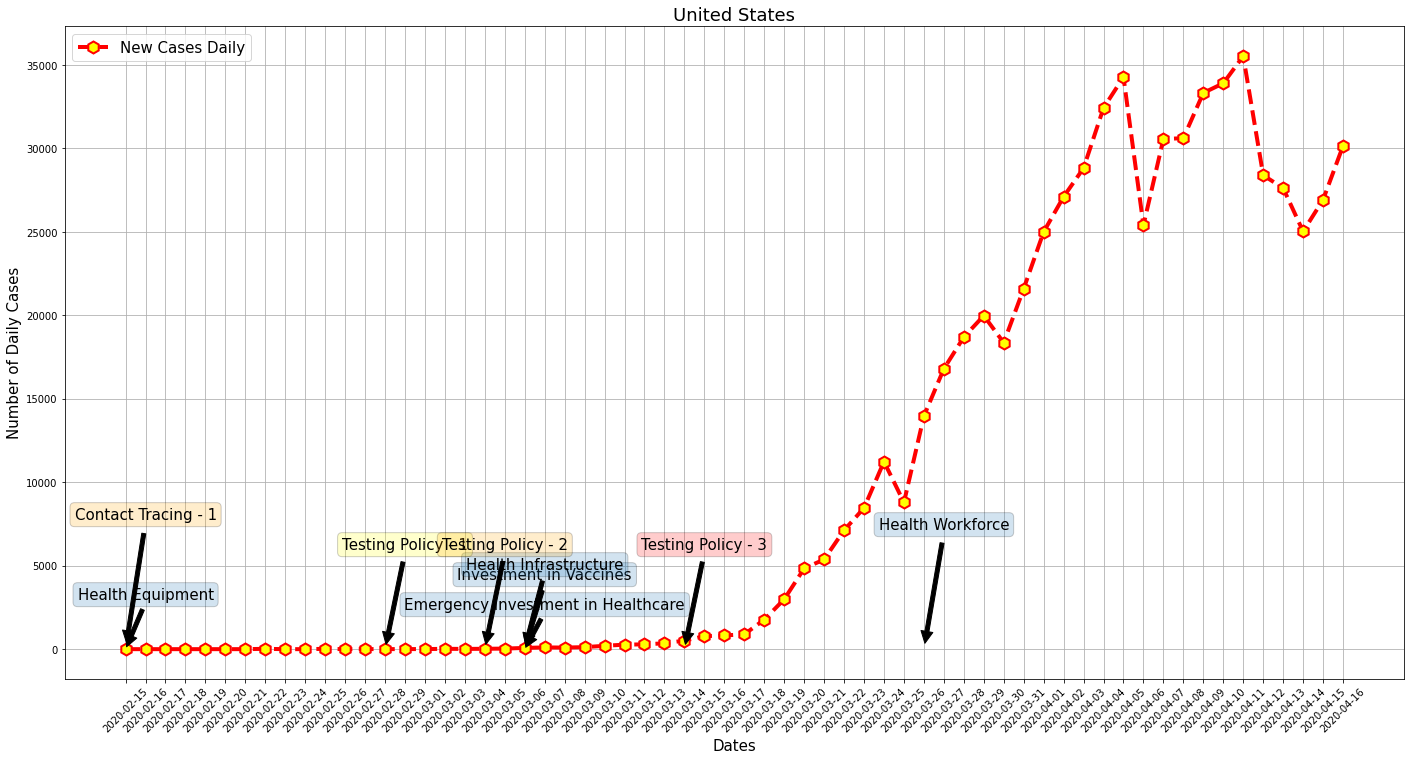

In [10]:
for country in countries :
  plot_country(country) 

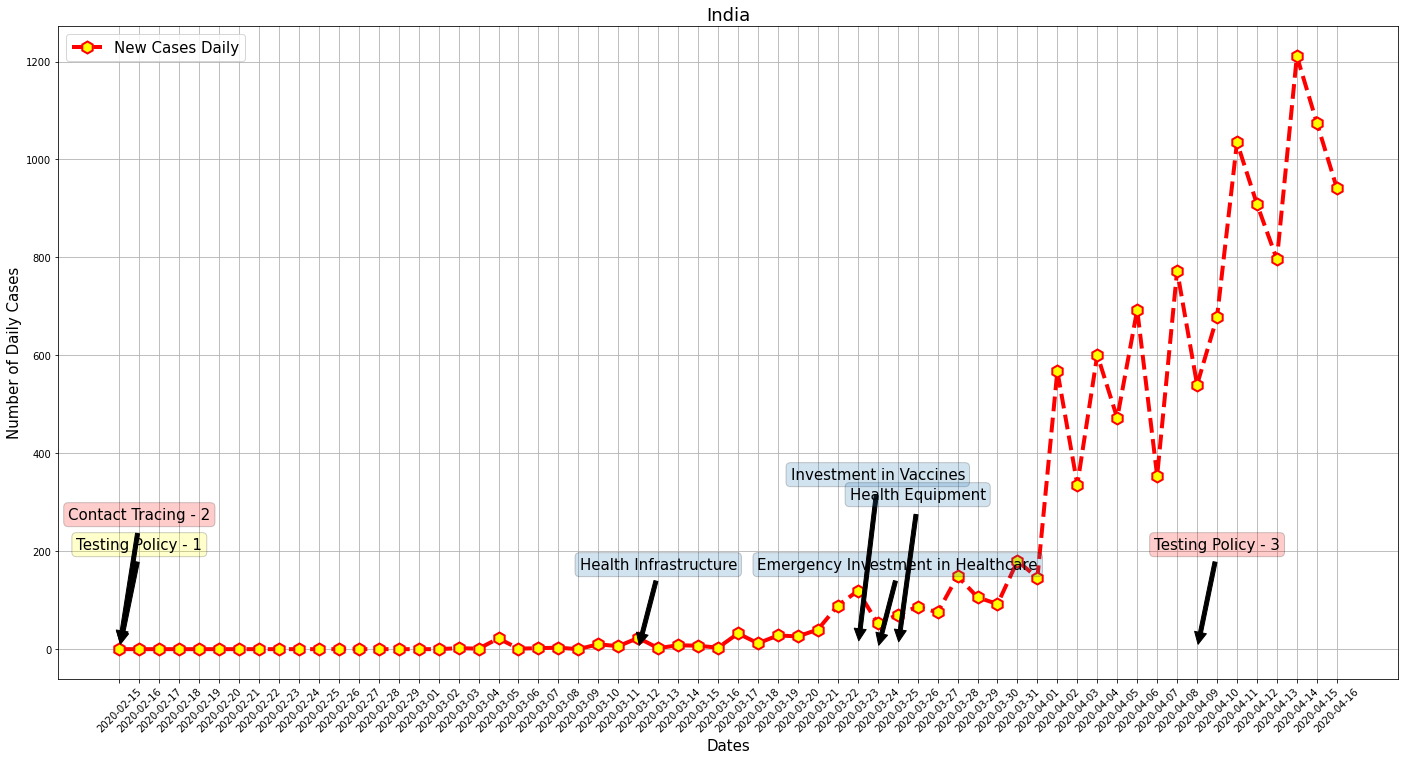

In [11]:
country_name = 'India'
country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 16/04
dates = xdates 
country_mobility_data = country_mobility_data.head(62) # 15th Feb .... 16th April
dates = xdates
  
country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data

new_cases = [None] * 62
new_cases[0] = 0
country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
policy_new_cases = country_policies['ConfirmedCases'].tolist()
# print(len(policy_new_cases))
# print(policy_new_cases)
max_cases = max(policy_new_cases)
for i in range(1, len(new_cases)) :
  if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
  new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) #/ max_cases * 1000 
# print(new_cases)

fig, ax = plt.subplots(figsize=(24,12))

# Oxford Policy Stringency Data
# ax.plot_date(dates, country_policies.StringencyIndex, linestyle='--', label = 'Stringency Index')
# Oxford Policy Confirmed Cases Data 
#ax.plot_date(dates, country_policies.ConfirmedCases/100 , linestyle='--', label = 'Confirmed Cases',linewidth=4,marker='h', markerfacecolor='lightgreen', markeredgewidth=2,markersize=12)
ax.plot_date(dates, new_cases , linestyle='--', label = 'New Cases Daily',linewidth=4,marker='h', markerfacecolor='yellow', markeredgewidth = 2, markersize = 12, color = 'red')
# Oxford Healthcare Data Annotations
s10 = country_policies['S10_Emergency investment in health care'].tolist()
for x in range(len(s10)):
  if s10[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Emergency Investment in Healthcare", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 80), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

s11 = country_policies['S11_Investment in Vaccines'].tolist() 
for x in range(len(s11)):
  if s11[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Investment in Vaccines", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 170), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

infra = country_policies['Health_infrastructure'].tolist()
for x in range(len(infra)):
  if infra[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Infrastructure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 80), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

equip = country_policies['Health_equipment'].tolist()
for x in range(len(equip)):
  if equip[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Equipment", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 150), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

workforce = country_policies['Health_workforce'].tolist()
for x in range(len(workforce)):
  if workforce[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Workforce", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

other = country_policies['Managing_other_health_services'].tolist()
for x in range(len(other)):
  if other[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Managing other health services", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break


s12 = country_policies['S12_Testing policy'].tolist()
for x in range(len(s12)):
  if s12[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- yellow
    ax.annotate("Testing Policy - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='yellow'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- orange
    ax.annotate("Testing Policy - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 3: # if the policy is there i.e value will be 3 .... add an arrow annotation at that point -- red
    ax.annotate("Testing Policy - 3", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break  

s13 = country_policies['S13_Contact tracing'].tolist()
for x in range(len(s13)):
  if s13[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- orange
    ax.annotate("Contact Tracing - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s13)):
  if s13[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- red
    ax.annotate("Contact Tracing - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

plt.title(country_name, fontsize=18)
plt.grid(True)
plt.xlabel("Dates", fontsize=15)
plt.ylabel("Number of Daily Cases", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.axis('tight')
plt.style.context('seaborn-white')
plt.xticks(rotation=45)
plt.show()

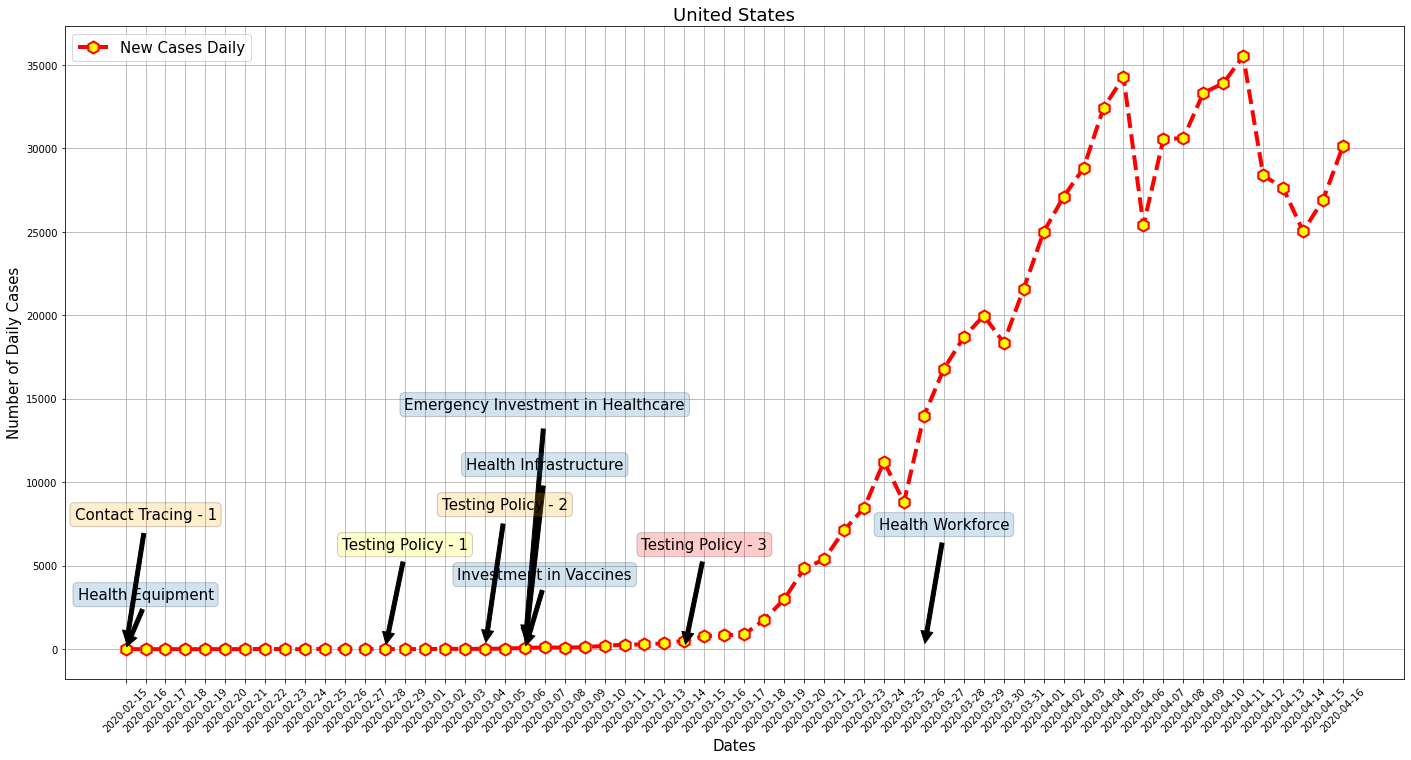

In [12]:
country_name = 'United States'
country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 16/04
dates = xdates 
country_mobility_data = country_mobility_data.head(62) # 15th Feb .... 16th April
dates = xdates
  
country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data

new_cases = [None] * 62
new_cases[0] = 0
country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
policy_new_cases = country_policies['ConfirmedCases'].tolist()
# print(len(policy_new_cases))
# print(policy_new_cases)
max_cases = max(policy_new_cases)
for i in range(1, len(new_cases)) :
  if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
  new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) #/ max_cases * 1000 
# print(new_cases)

fig, ax = plt.subplots(figsize=(24,12))

# Oxford Policy Stringency Data
# ax.plot_date(dates, country_policies.StringencyIndex, linestyle='--', label = 'Stringency Index')
# Oxford Policy Confirmed Cases Data 
#ax.plot_date(dates, country_policies.ConfirmedCases/100 , linestyle='--', label = 'Confirmed Cases',linewidth=4,marker='h', markerfacecolor='lightgreen', markeredgewidth=2,markersize=12)
ax.plot_date(dates, new_cases , linestyle='--', label = 'New Cases Daily',linewidth=4,marker='h', markerfacecolor='yellow', markeredgewidth = 2, markersize = 12, color = 'red')
# Oxford Healthcare Data Annotations
s10 = country_policies['S10_Emergency investment in health care'].tolist()
for x in range(len(s10)):
  if s10[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Emergency Investment in Healthcare", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 240), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

s11 = country_policies['S11_Investment in Vaccines'].tolist() 
for x in range(len(s11)):
  if s11[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Investment in Vaccines", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 70), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

infra = country_policies['Health_infrastructure'].tolist()
for x in range(len(infra)):
  if infra[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Infrastructure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 180), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

equip = country_policies['Health_equipment'].tolist()
for x in range(len(equip)):
  if equip[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Equipment", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

workforce = country_policies['Health_workforce'].tolist()
for x in range(len(workforce)):
  if workforce[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Workforce", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

other = country_policies['Managing_other_health_services'].tolist()
for x in range(len(other)):
  if other[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Managing other health services", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break


s12 = country_policies['S12_Testing policy'].tolist()
for x in range(len(s12)):
  if s12[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- yellow
    ax.annotate("Testing Policy - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='yellow'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- orange
    ax.annotate("Testing Policy - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 140), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 3: # if the policy is there i.e value will be 3 .... add an arrow annotation at that point -- red
    ax.annotate("Testing Policy - 3", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break  

s13 = country_policies['S13_Contact tracing'].tolist()
for x in range(len(s13)):
  if s13[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- orange
    ax.annotate("Contact Tracing - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s13)):
  if s13[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- red
    ax.annotate("Contact Tracing - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

plt.title(country_name, fontsize=18)
plt.grid(True)
plt.xlabel("Dates", fontsize=15)
plt.ylabel("Number of Daily Cases", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.axis('tight')
plt.style.context('seaborn-white')
plt.xticks(rotation=45)
plt.show()

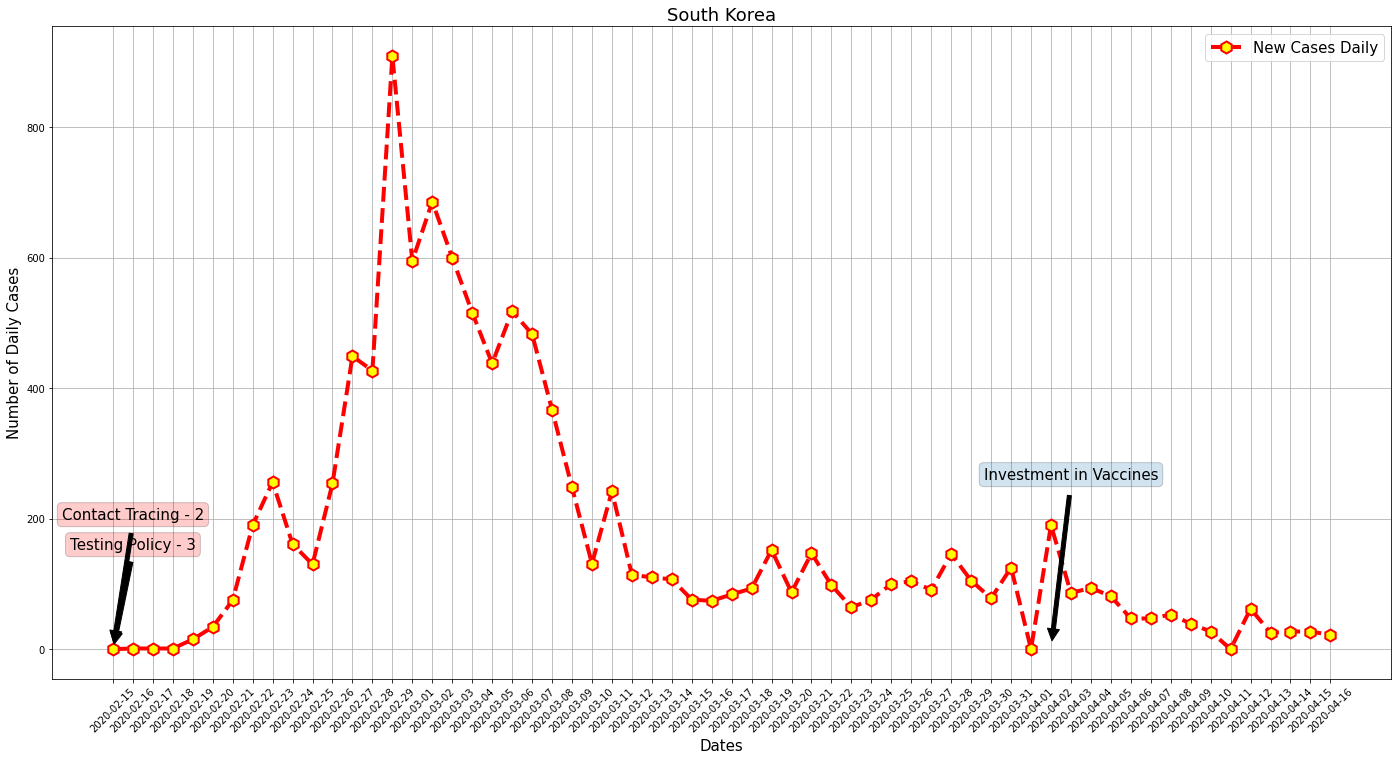

In [13]:
country_name = 'South Korea'
country_mobility_data = df.loc[df['country_region'] == country_name] # 15/02 .... 16/04
dates = xdates 
country_mobility_data = country_mobility_data.head(62) # 15th Feb .... 16th April
dates = xdates
  
country_policies = policy_data.loc[policy_data['CountryName'] == country_name]
country_policies = country_policies.iloc[45:] # remove 1/1 .... 14/02 policy data

new_cases = [None] * 62
new_cases[0] = 0
country_policies['ConfirmedCases'] = country_policies['ConfirmedCases'].replace(np.nan, 0)
policy_new_cases = country_policies['ConfirmedCases'].tolist()
# print(len(policy_new_cases))
# print(policy_new_cases)
max_cases = max(policy_new_cases)
for i in range(1, len(new_cases)) :
  if(policy_new_cases[i] == 0.0) : policy_new_cases[i] = policy_new_cases[i-1]
  new_cases[i] = (policy_new_cases[i] - policy_new_cases[i-1]) #/ max_cases * 1000 
# print(new_cases)

fig, ax = plt.subplots(figsize=(24,12))

# Oxford Policy Stringency Data
# ax.plot_date(dates, country_policies.StringencyIndex, linestyle='--', label = 'Stringency Index')
# Oxford Policy Confirmed Cases Data 
#ax.plot_date(dates, country_policies.ConfirmedCases/100 , linestyle='--', label = 'Confirmed Cases',linewidth=4,marker='h', markerfacecolor='lightgreen', markeredgewidth=2,markersize=12)
ax.plot_date(dates, new_cases , linestyle='--', label = 'New Cases Daily',linewidth=4,marker='h', markerfacecolor='yellow', markeredgewidth = 2, markersize = 12, color = 'red')
# Oxford Healthcare Data Annotations
s10 = country_policies['S10_Emergency investment in health care'].tolist()
for x in range(len(s10)):
  if s10[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Emergency Investment in Healthcare", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 40), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

s11 = country_policies['S11_Investment in Vaccines'].tolist() 
for x in range(len(s11)):
  if s11[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Investment in Vaccines", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 170), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

infra = country_policies['Health_infrastructure'].tolist()
for x in range(len(infra)):
  if infra[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Infrastructure", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 80), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

equip = country_policies['Health_equipment'].tolist()
for x in range(len(equip)):
  if equip[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Equipment", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

workforce = country_policies['Health_workforce'].tolist()
for x in range(len(workforce)):
  if workforce[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Health Workforce", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 120), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

other = country_policies['Managing_other_health_services'].tolist()
for x in range(len(other)):
  if other[x] > 0: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point
    ax.annotate("Managing other health services", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2), size=15, xytext=(20, 50), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break


s12 = country_policies['S12_Testing policy'].tolist()
for x in range(len(s12)):
  if s12[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- yellow
    ax.annotate("Testing Policy - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='yellow'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- orange
    ax.annotate("Testing Policy - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s12)):
  if s12[x] == 3: # if the policy is there i.e value will be 3 .... add an arrow annotation at that point -- red
    ax.annotate("Testing Policy - 3", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 100), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break  

s13 = country_policies['S13_Contact tracing'].tolist()
for x in range(len(s13)):
  if s13[x] == 1: # if the policy is there i.e value will be 1 .... add an arrow annotation at that point -- orange
    ax.annotate("Contact Tracing - 1", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='orange'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break
for x in range(len(s13)):
  if s13[x] == 2: # if the policy is there i.e value will be 2 .... add an arrow annotation at that point -- red
    ax.annotate("Contact Tracing - 2", xy=(dates[x], 0), bbox=dict(boxstyle="round", alpha=0.2, facecolor='red'), size=15, xytext=(20, 130), textcoords='offset points', ha='center',  
                arrowprops=dict(facecolor='black', shrink=0.05))
    break

plt.title(country_name, fontsize=18)
plt.grid(True)
plt.xlabel("Dates", fontsize=15)
plt.ylabel("Number of Daily Cases", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.axis('tight')
plt.style.context('seaborn-white')
plt.xticks(rotation=45)
plt.show()